In [62]:
import os
import json
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def main(data):
    csf_filter_json = "/mnt/storage/ji/YOLO8/runs/val/cmb_train_ALFA_resample_ESRGAN_t2s_3slices_cmbTrainOnly_conf0.01_0415_093907/csf_filter_predictions.json"
    if not os.path.exists(csf_filter_json) or os.stat(csf_filter_json).st_size == 0:
        with open(csf_filter_json, "w") as file:
            json.dump([], file)

    for detection in data:
        image_id = detection["image_id"]
        uid = image_id.split("-")[1].split("_")[0]
        slice_id = int(image_id.split("_")[-1])
        bbox = detection["bbox"]
        csf_mask_path = os.path.join(f"/mnt/storage/ji/csf_segment", uid, "T1_seg_0.nii.gz")

        with open(csf_filter_json, "r") as file:
            csf_filter_data = json.load(file)

        x_center = int(bbox[0] // 4)
        y_center = int(bbox[1] // 4)
        print(x_center, y_center)
        image = nib.load(csf_mask_path)
        image = image.get_fdata()
        image = np.rot90(image[:,:,slice_id])
    
        print("image[y_center, x_center]", image[y_center, x_center])
        
        if image[y_center, x_center] == 0.0:
            csf_filter_data.append(detection)
            print(f"0: {detection}")
        elif image[y_center, x_center] == 1.0:
            print(f"1: {detection}")
                        
        with open(csf_filter_json, "w") as file:
            json.dump(csf_filter_data, file, indent=4)

if __name__ == "__main__":
    file_path = "/mnt/storage/ji/YOLO8/runs/val/cmb_train_ALFA_resample_ESRGAN_t2s_3slices_cmbTrainOnly_conf0.01_0415_093907/predictions.json"
    with open(file_path, "r") as file:
        data = json.load(file)
    main(data)

239 330
image[y_center, x_center] 1.0
1: {'image_id': 'sub-231_slice_104', 'category_id': 1, 'bbox': [958.496, 1321.623, 33.659, 33.749], 'score': 0.04534}
276 168
image[y_center, x_center] 0.0
0: {'image_id': 'sub-231_slice_104', 'category_id': 1, 'bbox': [1105.348, 673.455, 31.952, 27.549], 'score': 0.04085}
181 232
image[y_center, x_center] 1.0
1: {'image_id': 'sub-231_slice_104', 'category_id': 1, 'bbox': [724.557, 928.287, 30.527, 27.637], 'score': 0.0115}
301 154
image[y_center, x_center] 1.0
1: {'image_id': 'sub-231_slice_104', 'category_id': 1, 'bbox': [1207.488, 616.947, 31.079, 28.004], 'score': 0.01096}
289 228
image[y_center, x_center] 0.0
0: {'image_id': 'sub-231_slice_104', 'category_id': 1, 'bbox': [1156.107, 914.539, 27.257, 26.191], 'score': 0.01077}
187 324
image[y_center, x_center] 1.0
1: {'image_id': 'sub-231_slice_103', 'category_id': 1, 'bbox': [751.847, 1296.812, 39.727, 36.316], 'score': 0.05219}
191 310
image[y_center, x_center] 0.0
0: {'image_id': 'sub-231_sli

KeyboardInterrupt: 

### Visualization

213     153
0.0


/tmp/ipykernel_4041175/2394378506.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


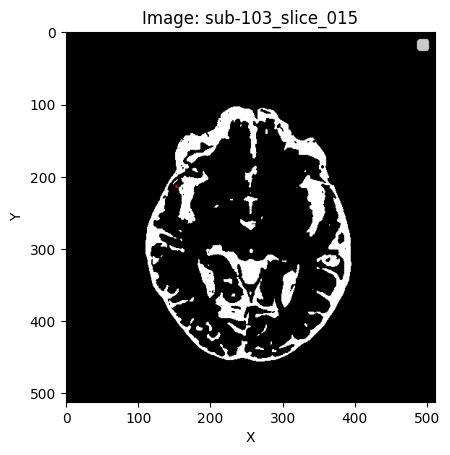

327     251
1.0


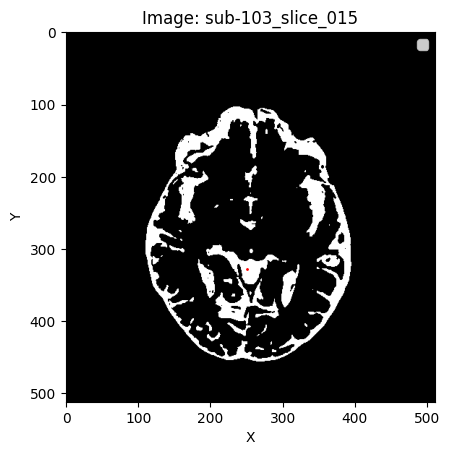

215     351
1.0


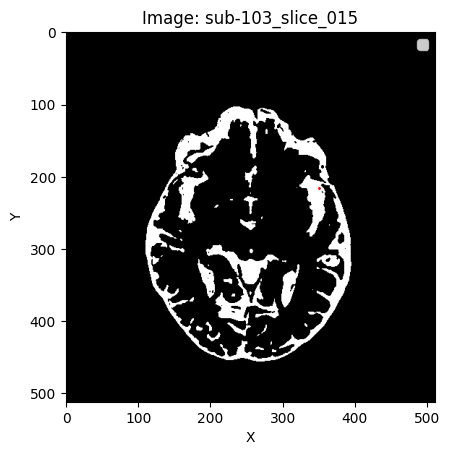

257     251
0.0


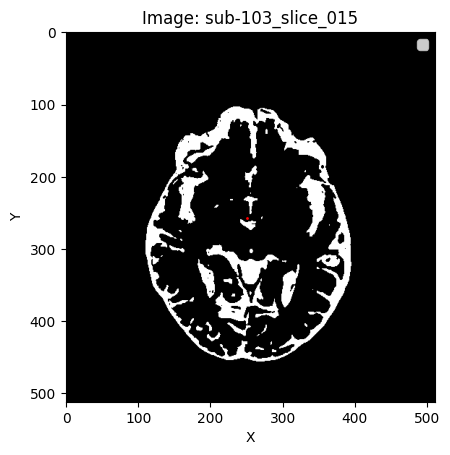

203     157
0.0


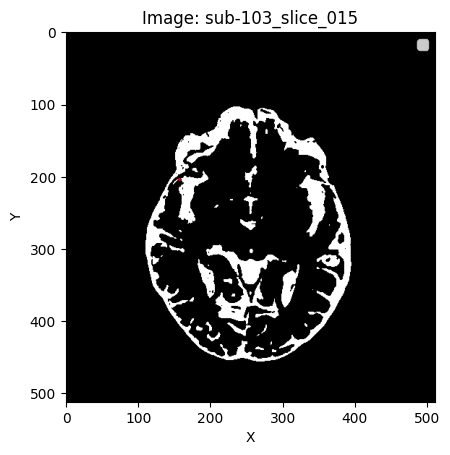

162     206
0.0


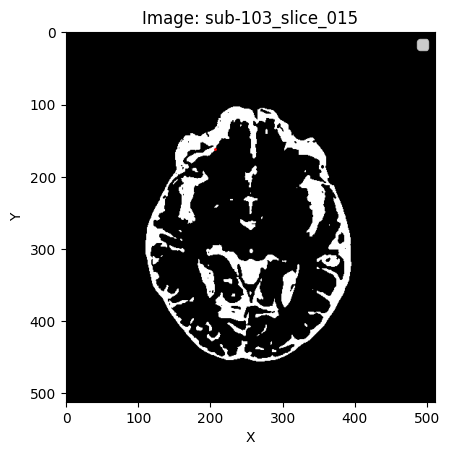

227     217
0.0


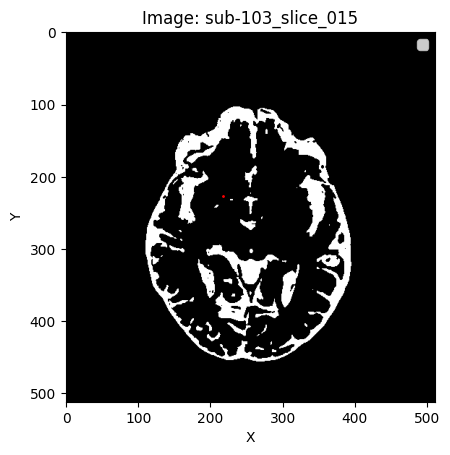

376     200
0.0


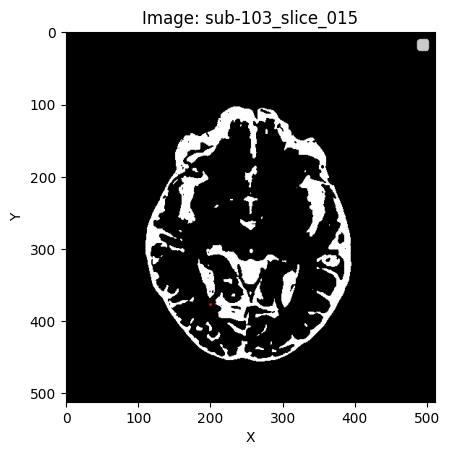

244     335
0.0


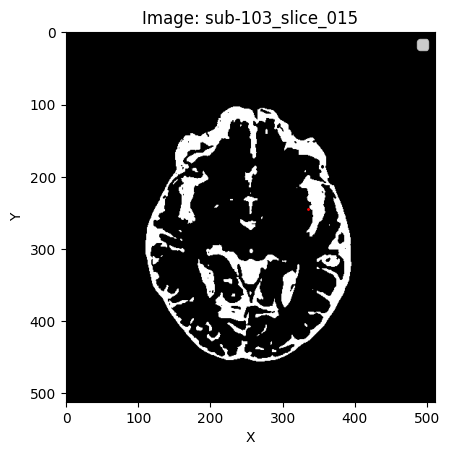

312     276
1.0


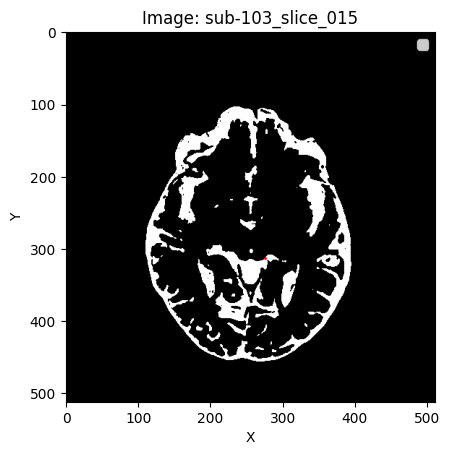

137     273
0.0


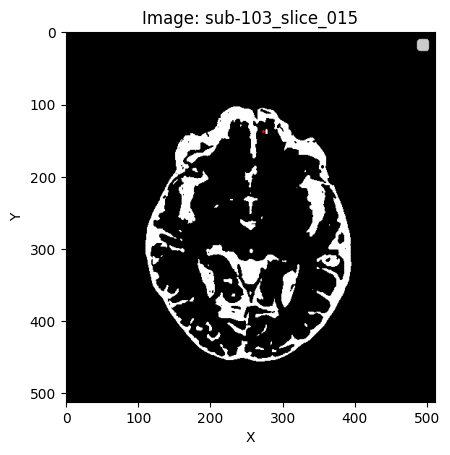

196     293
0.0


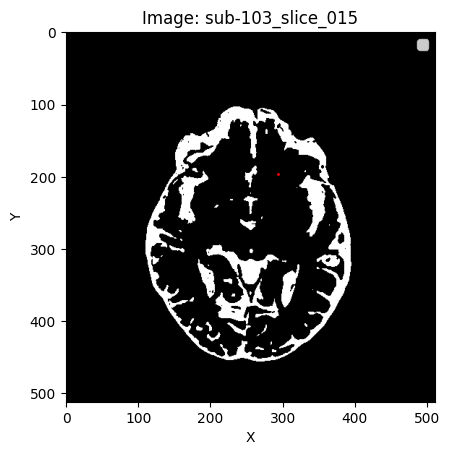

160     231
0.0


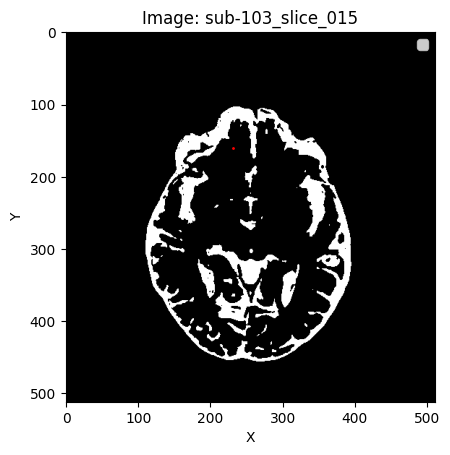

318     253
1.0


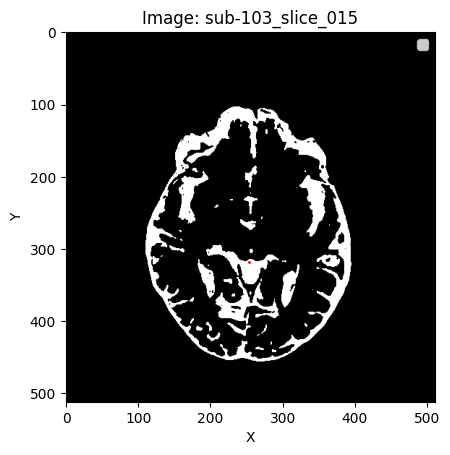

380     242
1.0


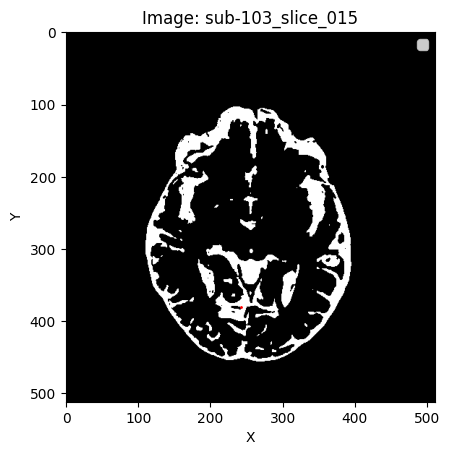

294     187
0.0


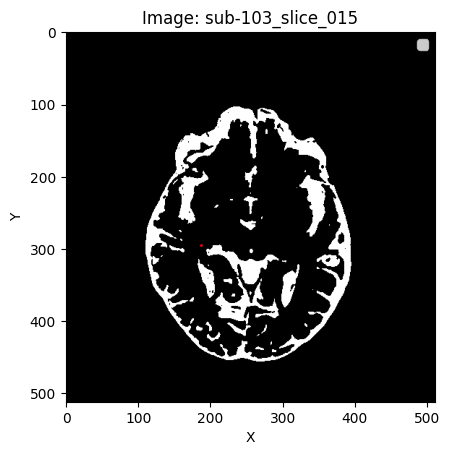

212     313
0.0


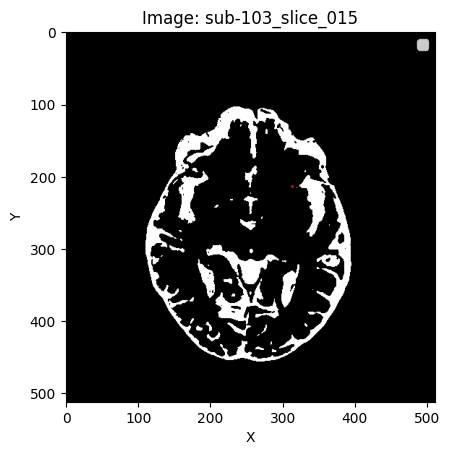

172     327
0.0


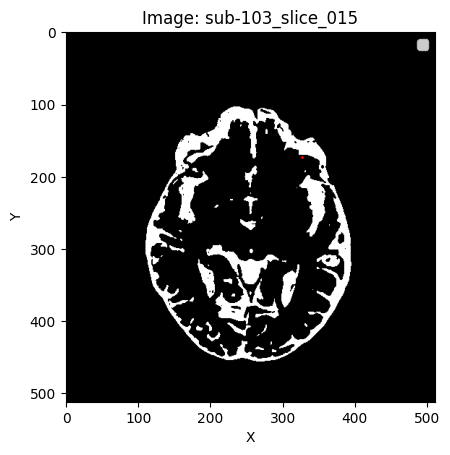

231     334
1.0


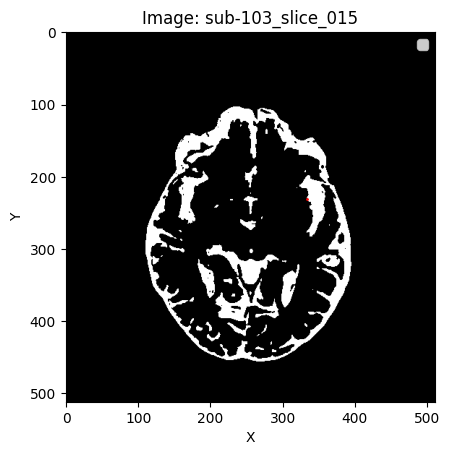

268     219
0.0


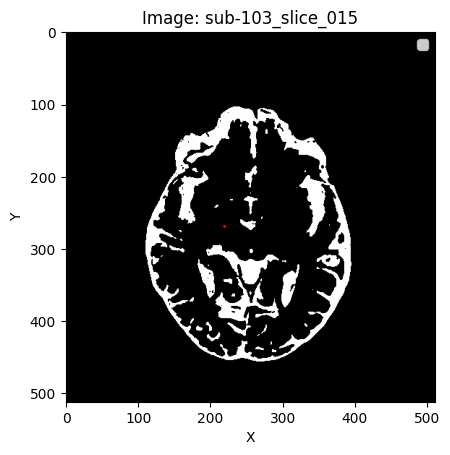

204     175
1.0


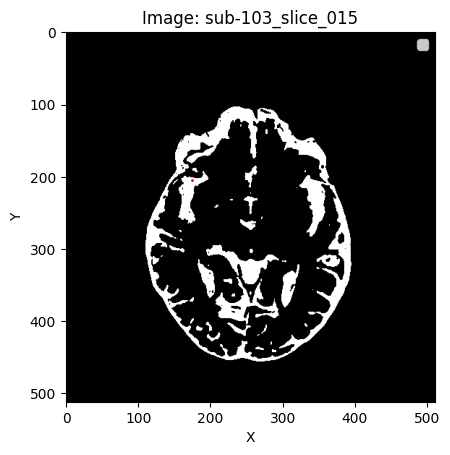

361     223
0.0


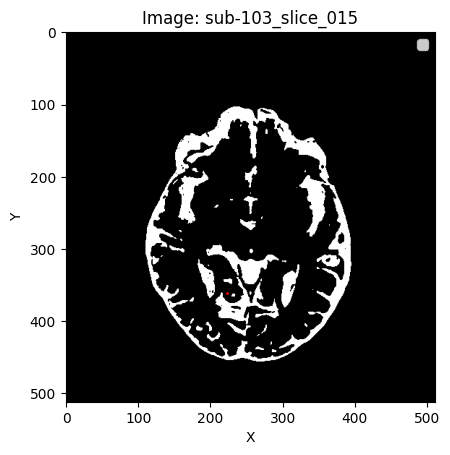

286     211
0.0


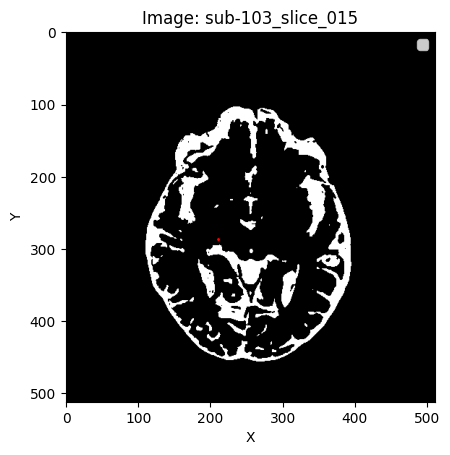

176     236
0.0


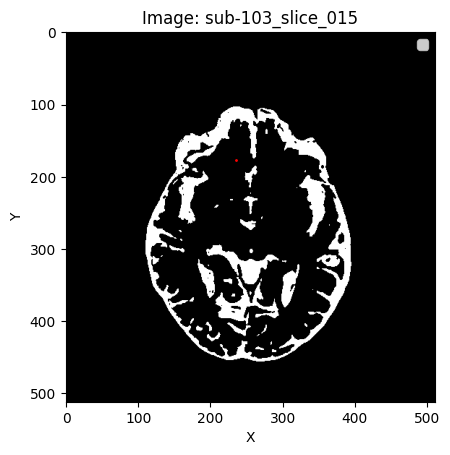

223     308
0.0


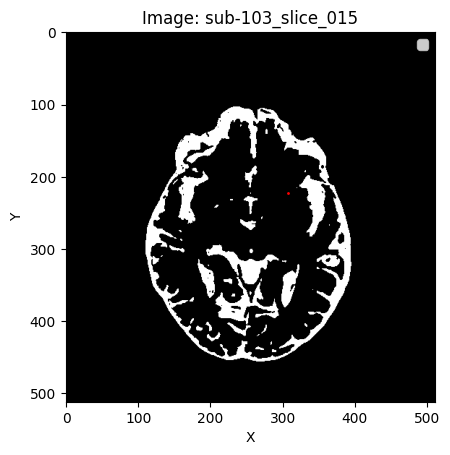

In [ ]:
def main(data):
    for detection in data:
        image_id = detection["image_id"]
        uid = image_id.split("-")[1].split("_")[0]
        slice_id = int(image_id.split("_")[-1])
        category_id = detection["category_id"]
        bbox = detection["bbox"]
        score = detection["score"]
        csf_mask_path = os.path.join(f"/mnt/storage/ji/csf_segment", uid, "T1_seg_0.nii.gz")

        if uid != "103" or slice_id != 15:
            continue

        x_center = int(bbox[0] / 4)
        y_center = int(bbox[1] / 4)
        
        uid = 103
        slice = 15
        image_path = f"/mnt/storage/ji/csf_segment/{uid}/T1_seg_0.nii.gz"
                
        image = nib.load(image_path)
        image = image.get_fdata()
        image = np.rot90(image[:,:,slice])

        print(y_center, "   ", x_center)
        print(image[y_center, x_center])

        plt.imshow(image, cmap='gray')
        plt.scatter(x_center, y_center, color='red', s=1)
        plt.legend()

        plt.title(f"Image: {image_id}")
        plt.xlabel("X")
        plt.ylabel("Y")

        plt.show()
        
   
if __name__ == "__main__":
    file_path = "/mnt/storage/ji/YOLO8/runs/val/cmb_train_ALFA_resample_ESRGAN_t2s_3slices_cmbTrainOnly_conf0.01_0415_093907/predictions.json"
    with open(file_path, "r") as file:
        data = json.load(file)
    main(data)